In [1]:
import numpy as np
import sympy as sm
from scipy.optimize import fsolve
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
f_pprime, f_prime, f = sm.symbols('f\'\', f\', f')
v_prime, v = sm.symbols('v\', v')
u_prime, u = sm.symbols('u\', u')
epsilon, lambduh, alpha_1, mu, alpha_2, g = sm.symbols('epsilon, lambda, alpha_1, mu, alpha_2, g')

In [3]:
nine_a = sm.Eq(f_pprime+epsilon**2 *lambduh*f_prime + f, epsilon*v_prime)
nine_a

Eq(epsilon**2*f'*lambda + f + f'', epsilon*v')

In [4]:
nine_b = sm.Eq((v_prime-u_prime) + alpha_1*v, -epsilon*f)
nine_b

Eq(alpha_1*v - u' + v', -epsilon*f)

In [5]:
nine_c = sm.Eq(-mu*(v_prime-u_prime) + u_prime + alpha_2*u, g)
nine_c

Eq(alpha_2*u - mu*(-u' + v') + u', g)

In [6]:
# Solve the system of equations
solutions = sm.solve([nine_a, nine_b, nine_c], (v_prime, u_prime, f_pprime))

# Display the solutions
solutions

{f'': -alpha_1*epsilon*mu*v - alpha_1*epsilon*v - alpha_2*epsilon*u - epsilon**2*f*mu - epsilon**2*f - epsilon**2*f'*lambda + epsilon*g - f,
 u': -alpha_1*mu*v - alpha_2*u - epsilon*f*mu + g,
 v': -alpha_1*mu*v - alpha_1*v - alpha_2*u - epsilon*f*mu - epsilon*f + g}

Define our states:
Variable Name | State
-----|------
f | x_1
f_prime | x_2
u | x_3
v | x_4


In [22]:
# Dimensional parameters
Cm = 2.201e-15
Cs = 1.62e-11
Cg = 2.32e-11
Lm = 4.496e-2
Rm = 5.62e1
Rs = 7.444e3
Rg = 5.168e4
Vth = -0.95
beta = 0.12
B = 0.8

# Compute nondimensional parameters
mu = Cg / Cs
alpha_1 = np.sqrt(Lm * Cm) / (Cg * Rg)
alpha_2 = np.sqrt(Lm * Cm) / (Cs * Rs)
epsilon = np.sqrt(Cm / Cg)
lambduh = Rm * Cg / np.sqrt(Lm * Cm)
gamma = beta * abs(Vth) * np.sqrt(Lm * Cm) / Cs

def g(value):
    if value >= 0:
        output = gamma*value**2
    else:
        output = 0
    return output
        

def colpitts(t, X):
    x_1, x_2, x_3, x_4 = X
    dx1_dt = x_2
    dx2_dt = -alpha_1*epsilon*mu*x_4 - alpha_1*epsilon*x_4 - \
                alpha_2*epsilon*x_3 - epsilon**2*x_1*mu - epsilon**2*x_1 - \
                epsilon**2*x_2*lambduh + epsilon*g(x_4-x_3+1) - x_1
    dx3_dt = -alpha_1*mu*x_4 - alpha_2*x_3 - epsilon*x_1*mu + g(x_4-x_3+1)
    dx4_dt = -alpha_1*mu*x_4 - alpha_1*x_4 - alpha_2*x_3 - epsilon*x_1*mu - epsilon*x_1 + g(x_4-x_3+1)
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt]

tspan = [0, 20]
    
# Solve the ODE
from scipy.integrate import solve_ivp
sol = solve_ivp(
    fun=colpitts,
    t_span=tspan,
    y0=[0,0,0,0],
    method='RK45',
    max_step=1e-4
)

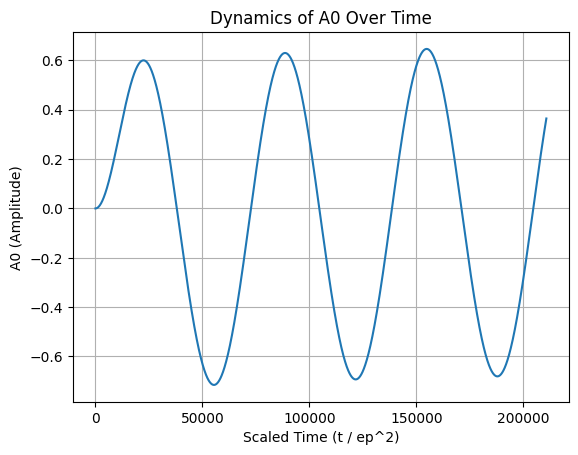

In [24]:
# Plot the results
plt.plot(sol.t / epsilon**2, sol.y[0])
plt.xlabel('Scaled Time (t / ep^2)')
plt.ylabel('A0 (Amplitude)')
plt.title('Dynamics of A0 Over Time')
plt.grid()
plt.savefig('test.png')